In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
from pandas import Series, DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, PassiveAggressiveClassifier, RidgeClassifierCV, SGDClassifier, Perceptron
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV, ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, auc, roc_curve, roc_auc_score, log_loss, precision_score, recall_score, f1_score, make_scorer

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import chi2, SelectKBest

from xgboost import XGBClassifier


In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

# DATA EXPLORATION

In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print(train_data.columns)
print(test_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
TrainDf=train_data
TestDf=test_data
TrainDf.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
TestDf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# DATA PREPROCESSING

In [8]:
print(TrainDf.isnull().sum()/TrainDf.shape[0]*100)
print(50*"-")
print(TestDf.isnull().sum()/TestDf.shape[0]*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
--------------------------------------------------
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


In [9]:
TrainDf.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)
TestDf.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [10]:
TrainDf['Age'] = TrainDf['Age'].fillna(TrainDf["Age"].median())
TestDf['Age'] = TestDf['Age'].fillna(TestDf["Age"].median())

In [11]:
TrainDf[TrainDf['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [12]:
TrainDf['Embarked'].fillna(TrainDf['Embarked'].mode,inplace=True)

In [13]:
print(TrainDf.isnull().sum()/TrainDf.shape[0]*100)
print(50*"-")
print(TestDf.isnull().sum()/TestDf.shape[0]*100)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64
--------------------------------------------------
Pclass      0.000000
Sex         0.000000
Age         0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.239234
Embarked    0.000000
dtype: float64


In [14]:
TestDf[TestDf['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,male,60.5,0,0,NaN,S


# EDA

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Age', ylabel='Density'>

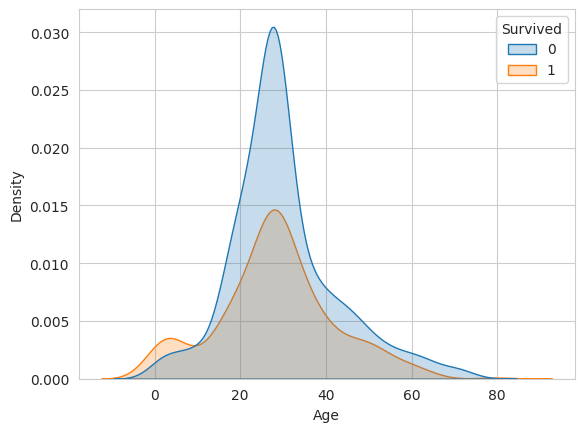

In [15]:
sns.kdeplot(TrainDf,x='Age',hue='Survived',fill=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Fare', ylabel='Density'>

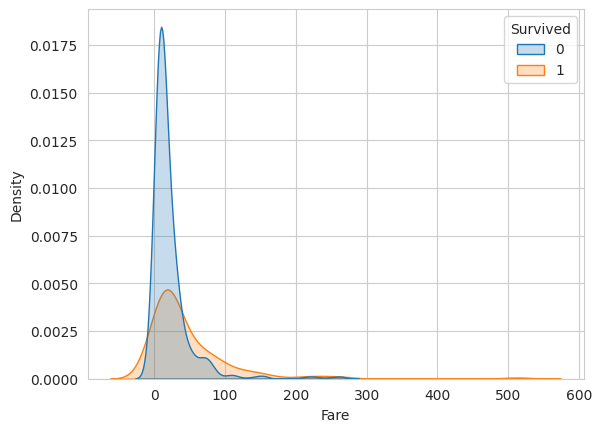

In [16]:
sns.kdeplot(TrainDf,x='Fare',hue='Survived',fill=True)

<Axes: xlabel='Pclass', ylabel='Survived'>

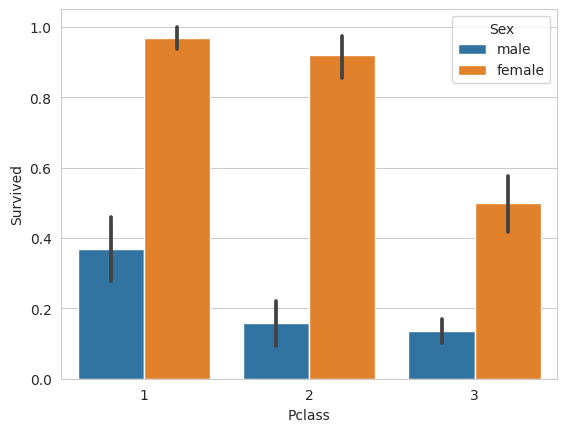

In [17]:
sns.barplot(TrainDf,x="Pclass", y="Survived", hue="Sex")


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

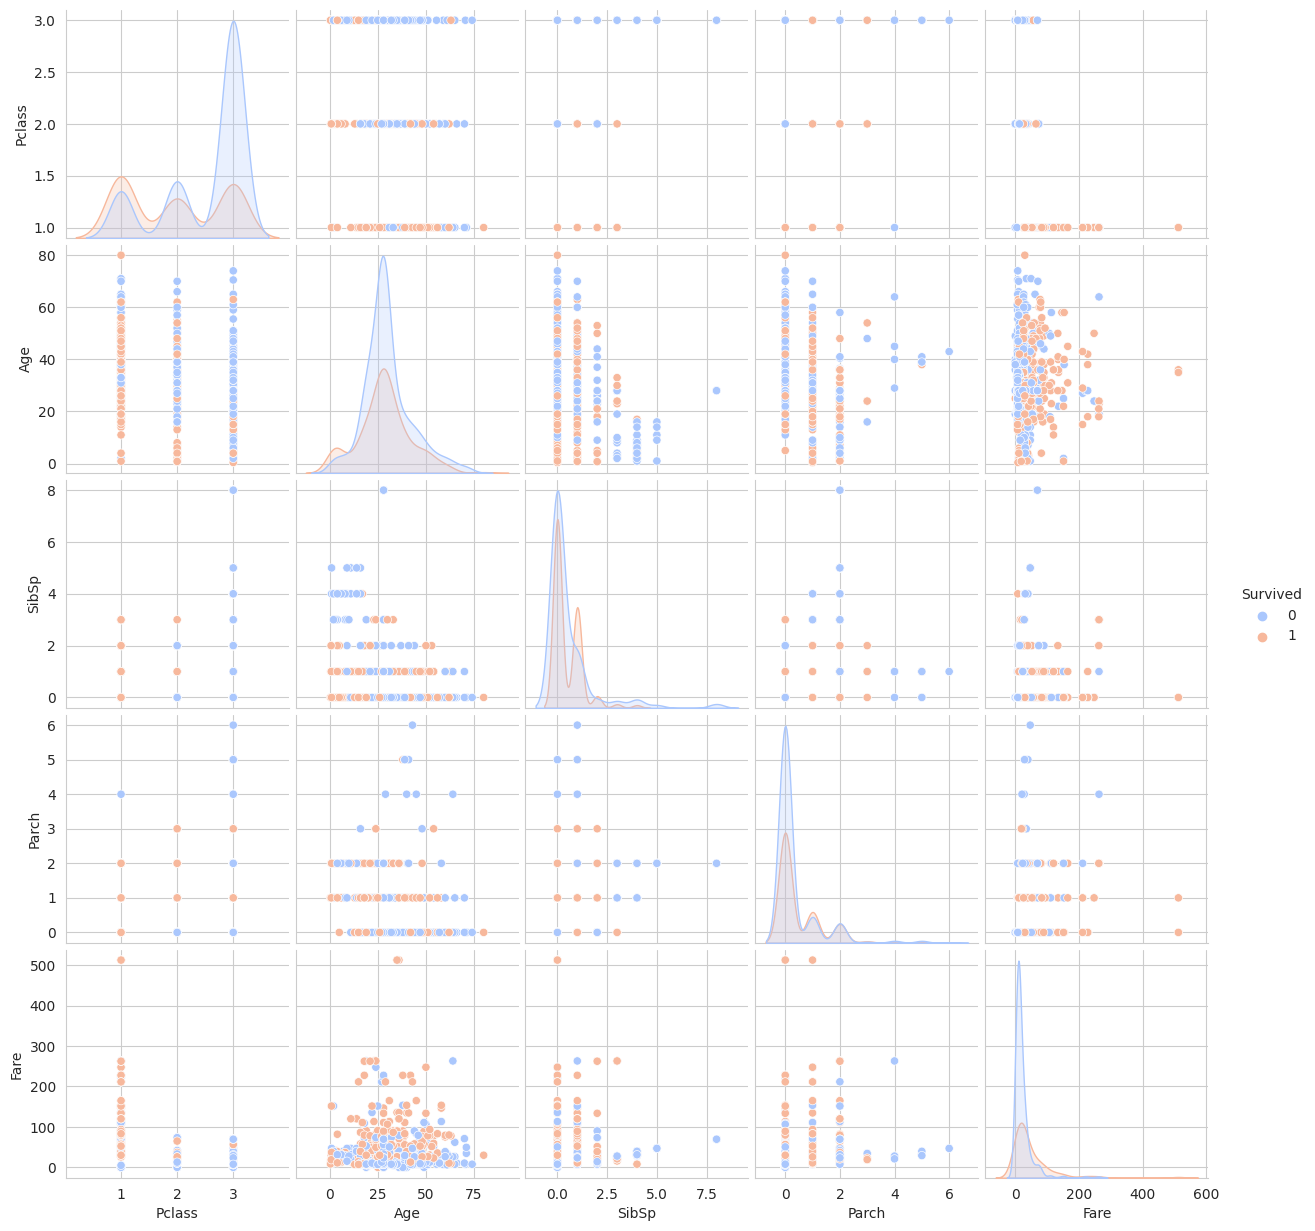

In [18]:
sns.pairplot(TrainDf,hue="Survived",palette='coolwarm')

# LABEL ENCODING

In [19]:
for col in TrainDf.columns:
    print(f'Valores únicos en {col}: {TrainDf[col].unique()}\n\n')

Valores únicos en Survived: [0 1]


Valores únicos en Pclass: [3 1 2]


Valores únicos en Sex: ['male' 'female']


Valores únicos en Age: [22.   38.   26.   35.   28.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.  ]


Valores únicos en SibSp: [1 0 3 4 2 5 8]


Valores únicos en Parch: [0 1 2 5 3 4 6]


Valores únicos en Fare: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792  

In [20]:
label_encoder= LabelEncoder()
TrainDf['Sex']=label_encoder.fit_transform(TrainDf['Sex'])

In [21]:
TrainDf=pd.get_dummies(TrainDf,columns=['Embarked'],drop_first=True)

In [22]:
TrainDf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,True


<Axes: >

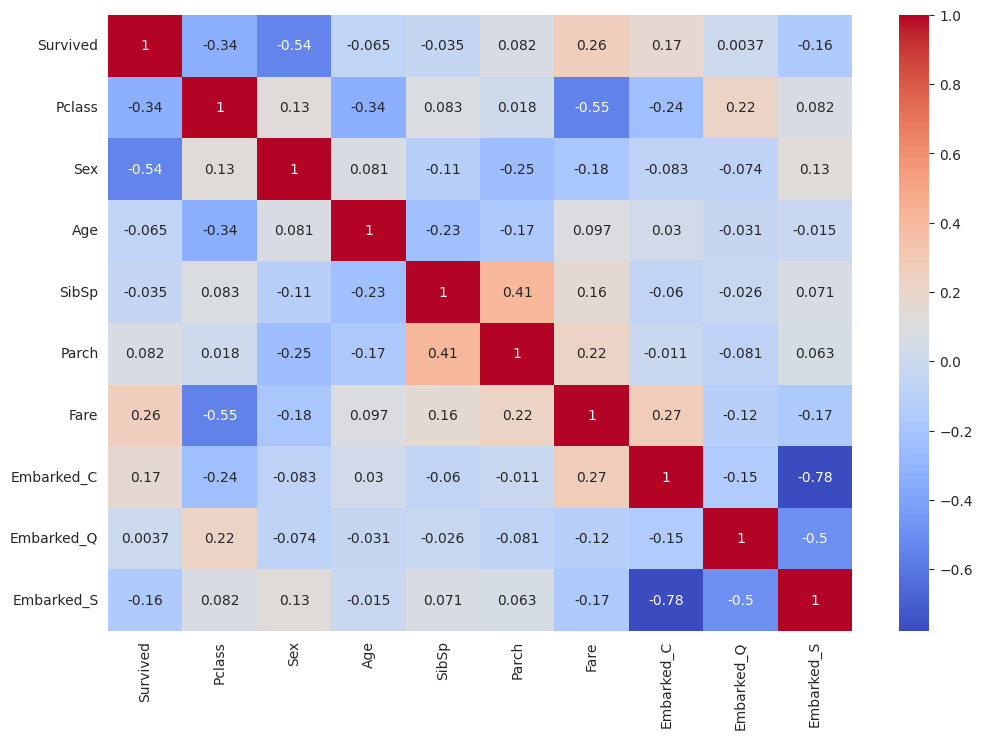

In [23]:
heatmap=TrainDf.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap, annot=True, cmap='coolwarm')


# FEATURE ENGINEERING 

In [24]:
## drop 

# MODEL FITTING AND PREDICTING

In [25]:
MLA = [
    # Ensemble Methods
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),

    # Gaussian Processes
    GaussianProcessClassifier(),
    
    # GLM
    LogisticRegressionCV(),
    PassiveAggressiveClassifier(),
    RidgeClassifierCV(),
    SGDClassifier(),
    Perceptron(),
    
    # Naive Bayes
    BernoulliNB(),
    GaussianNB(),
    
    # Nearest Neighbor
    KNeighborsClassifier(),
    
    # SVM
    SVC(probability=True),
    NuSVC(probability=True),
    LinearSVC(),
    
    # Trees    
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    
    # Discriminant Analysis
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),

    # XGBoost
    XGBClassifier()
]



In [72]:
x_columns=[ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S']
ycol=TrainDf['Survived']
y= ycol.to_numpy()


split=ShuffleSplit(n_splits=4,train_size=0.6,test_size=0.2,random_state=40)

##### TABLA PARA COMPARAR ACCURACY DE MODELOS
column_titles=['ML MODEL','MODEL PARAMETERS','TRAIN ACCURACY','TEST ACCURACY','TIME','DISPERSION']
ml_models= pd.DataFrame(columns=column_titles)


##### TABLA PARA GUARDAR LOS PREDICT DE LOS MODELOS
ml_predict=y

index=0

for model in MLA:
    modelname=model.__class__.__name__
    ml_models.loc[index, 'ML MODEL']= modelname
    ml_models.loc[index,'MODEL PARAMETERS']=str(model.get_params())

    cvresults= cross_validate(model,TrainDf[x_columns],y,cv=split)
    
    ml_models.loc[index,'TIME']=cvresults['fit_time'].mean()
    #ml_models.loc[index,'TRAIN ACCURACY']=cvresults['train_score'].mean()
    ml_models.loc[index,'TEST ACCURACY']= cvresults['test_score'].mean()
    ml_models.loc[index,'DISPERSION']= cvresults['test_score'].std()*3
    
    
    #####ML PREDICTIONS
    
    model.fit(x,y)
    ml_predict[modelname]=model.predict(x)
    
    index+=1

ml_model
    
    
    
    
    



    

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices